## SVM

データ生成

In [1]:
import numpy as np
def generate_data(sample_size):
    """Generate training data.
    :param sample_size: number of data points in the sample
    :return: a tuple of data point and label
    """

    x = np.random.normal(size=(sample_size, 2))
    x[:sample_size // 2, 0] -= 5.
    x[sample_size // 2:, 0] += 5.
    y = np.concatenate([np.ones(sample_size // 2, dtype=np.int64),
                        -np.ones(sample_size // 2, dtype=np.int64)])
    x[:3, 1] -= 5.
    y[:3] = -1
    x[-3:, 1] += 5.
    y[-3:] = 1
    return x, y

In [2]:
xs, ys_train = generate_data(200)

ys_binary = (ys_train+1)//2

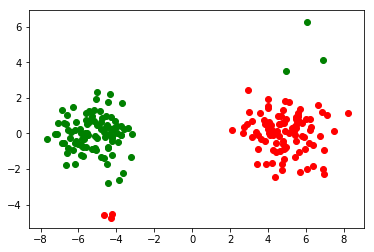

In [3]:
%matplotlib inline
from scripts.visualizers import draw_scatter
draw_scatter(xs, ys_binary)

普通の線形分類器

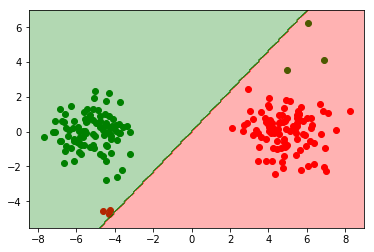

In [4]:
from models.linear_regressor import LinearRegressor

model = LinearRegressor(basis_functions=[lambda x: x])
model.fit(xs, ys_train)
draw_scatter(xs, ys_binary, model)

SVM

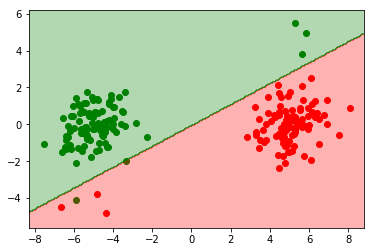

In [5]:
from models.linear_svm import LinearSVM

model = LinearSVM(l2_regularization=0.001)
model.fit(xs, ys_train, stepsize=0.1)
draw_scatter(xs, ys_binary, model)